# Car Price Prediction Project
We will look at Linear Regression in Python using a car pricing prediction project

# Data Prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/CarPriceData.csv")
print("Number of rows: ", len(df))
df.head()

Number of rows:  11914


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


As we can see, the column names are all quite different (spaces, _, case, etc.). So, let's normalize it:

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Let's do the same thing for the values in the dataframe. We can get all the columns with values of type `string` using `dtype`

In [4]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

We are only concerned with the `object` type (strings).

In [5]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The values on the left are **indices** while the values on the right are **values**.
<br>
So, we can call `index` on the returned values and convert it into a python list for easy looping. We will do the same thing we did above but for each column.

In [6]:
print(df.dtypes[df.dtypes == "object"].index)
string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# EDA
An exploration of the data. Let's explore the columns first.

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #Just to limit us to 5
    print("Number of unique values: ", df[col].nunique())
    print("\n")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values:  48


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values:  914


year
[2011 2012 2013 1992 1993]
Number of unique values:  28


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values:  10


engine_hp
[335. 300. 230. 320. 172.]
Number of unique values:  356


engine_cylinders
[ 6.  4.  5.  8. 12.]
Number of unique values:  9


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values:  5


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values:  4


number_of_doors
[ 2.  4.  3. nan]
Number of unique values:  3


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Number of unique va

## Plot Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns #A library built on top of matplotlib

<Axes: xlabel='msrp', ylabel='Count'>

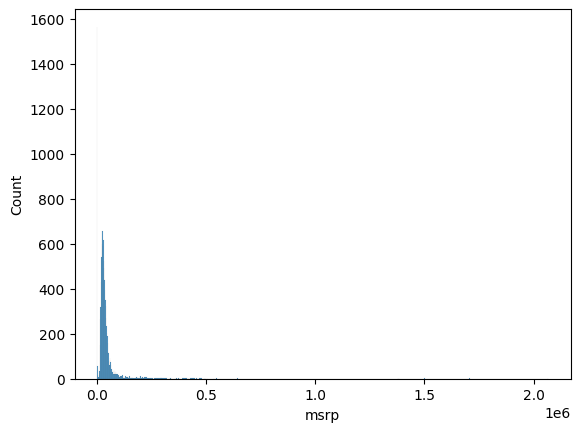

In [9]:
sns.histplot(df["msrp"])

As we can see, the graph is pretty skewed and hard to read. Use `bins` to create fewer groups. Play with the value of the bin until we find a value that works for us. 
<br>
We then add some labels to make the graph more informative

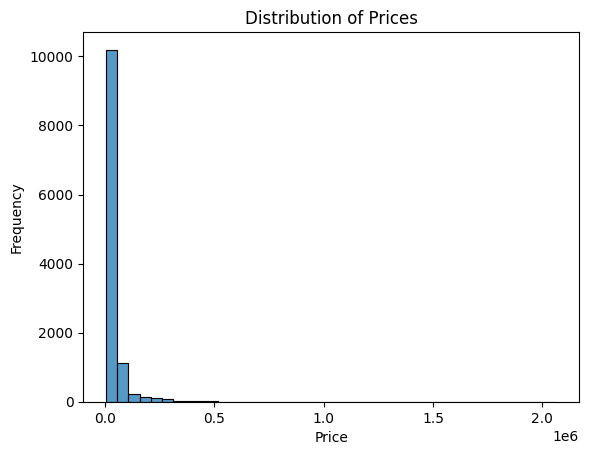

In [10]:
sns.histplot(df.msrp, bins = 40)
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.title("Distribution of Prices")
plt.show()

To zoom in, we will filter prices to smaller values to understand the distribution better

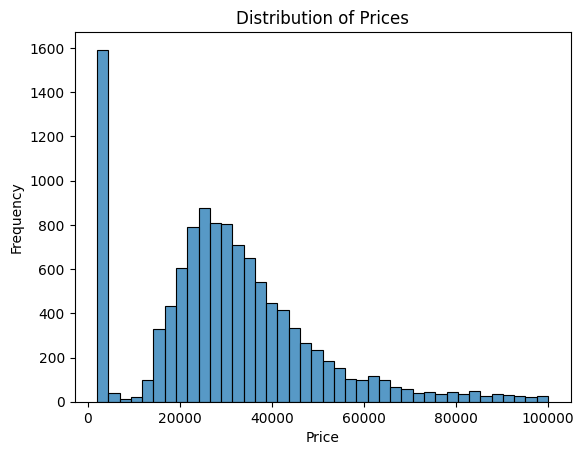

In [11]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 40)
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.title("Distribution of Prices")
plt.show()

Now, we should look at whether or not this makes sense. This does, most cars that are bought would be reasonably prices with a few cars at higher price points. As the price increases, we see fewer models available which is what we expect as those cars would not be (1) sold frequently and (2) would not be as common. The only somewhat strange value is the number of cars with a pricepoint around 1000 but this could be a unique business decision, etc. In real life we would investigate why this is the case.

## Log Distribution
This type of skewed distribution is not good for ML models so we will apply the `log` distribution to scale the data to values closer together.
<br>
One issue is that of 0's. Obviously, we can't log these so what we do is add one to each number and this will solve our problem.

In [12]:
np.log([0+1, 10+1, 100+1, 1000+1, 10000+1, 100000+1])

array([ 0.        ,  2.39789527,  4.61512052,  6.90875478,  9.21044037,
       11.51293546])

Let's apply this to our data and plot

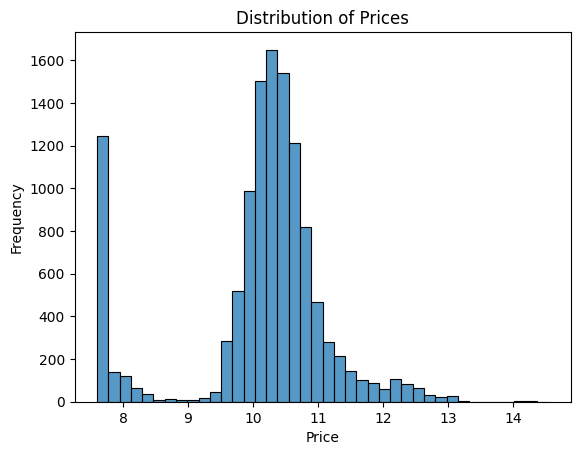

In [13]:
price_logs = np.log(df.msrp + 1)
sns.histplot(price_logs, bins = 40)
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.title("Distribution of Prices")
plt.show()

As you can see, we sort of resemble a normal distribution here. This is quite good for ML models.

## Missing Values
Now, let's clear out missing values.

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation Framework
This is simply splitting the dataframe up into a **train**, **validation** and **test** set. We will do a 60/20/20 split.

In [15]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

Now, to get the actual rows of data, we can use `iloc` which can handle ranges (just indexes df)

In [16]:
df.iloc[7:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [17]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train : n_train + n_val] #i.e. next n_test elements
df_test = df.iloc[n_train + n_val:]
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


The problem is that our dataset may have/could've been sorted therefore we might have entries in, for example *make* that is not present in one set. To correct this, we will randomise our df.
<br>
<br>
To do this, we will randomize index positions (0..n) and then split the indices into the 60/20/20 split. We then use those indices with `iloc`

In [18]:
idx = np.arange(n)
np.random.seed(2) #for reproducability
np.random.shuffle(idx)

df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


We will use the idea of indexing via the shuffled array to get our sets. We then reset the index in each sub dataframe so that they all start at 0

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]] #i.e. next n_test elements
df_test = df.iloc[idx[n_train + n_val:]]
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

## Getting Y's

We will get the y variables (MSRP) and apply the log transformation to them (as motivated earlier). 
<br>
`np.log1p` does the `log(x+1)` for us

In [20]:
y_train = np.log1p(df_train.msrp.values) #Only take values, not index
y_val = np.log1p(df_val.msrp.values) #Only take values, not index
y_test = np.log1p(df_test.msrp.values) #Only take values, not index

But!!! Remember to remove it from the dataframe

In [21]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

# Let's start with basic LR
## Scalar Form

In [22]:
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1] #random initialization

def linear_regression(xi):
    n = len(xi)

    pred = w0
    for j in range(n): #for every elements
        pred = pred + w[j] * xi[j]
    return pred

In [23]:
linear_regression(xi)

550

But remember, we initially did the log(x+1) transformation on MSRP so we need to reverse this - `expm1`

In [24]:
np.expm1(linear_regression(xi))

7.277212331783397e+238

## Vector Form

In [25]:
def dot(xi, w):
    n = len(xi)
    res = 0
    for j in range(n):
        res = res + xi[j]*w[j]
    return res

In [30]:
A = [1,2,3]
B = [1,5,7]
dot(A, B)

32

We can now update the method to the vector form. We verify that we get the same answer as before.

In [27]:
def linear_regression(xi):
    return w0 + dot(xi, w)
linear_regression(xi)

550

We can go ahead and bring w0 into W to make the equation neater. For this, the first feature of xi would be a `1`. Again, the result should be the same.

In [28]:
w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
linear_regression(xi)

550

## Matric Form
First, let's look at matrix multiplication.

In [41]:
x1 = [1, 148, 24, 1385] #Note, the 1 for W0
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

w0 = 7.17
w = [0.01, 0.04, 0.002] #random initialization
w_new = [w0] + w

X = [x1, x2, x3] #Creates matrix
X = np.array(X)

# Now, the matrix multiplication is just the dot product
print("We can get the prediction for each observation:")
X.dot(w_new)

We can get the prediction for each observation


array([12.38 , 13.552, 12.312])

Now, put this into a method.

In [43]:
def linear_regression(X):
    return X.dot(w_new)
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training LR Model
So, by now we know how to actually get predictions given w and X. But, how do we find the optimal weights? We know that `y_hat = X.w` and ideally we want `y_hat ≈ y` by getting the optimal weights.

In [44]:
def train_linear_regression(X, y):
    pass

We do not implement it right now because we need to understand what is happening first.

In [68]:
X = [
    [148, 24, 1385], 
    [132, 25, 2031],
    [453, 11, 86],
    [148, 24, 1385], 
    [189, 27, 2331],
    [443, 51, 866],
    [128, 34, 185], 
    [192, 205, 231],
    [473, 61, 86]
] #Creates matrix
X = np.array(X)
ones = np.ones(X.shape[0]) #Gets number of rows
X = np.column_stack([ones, X]) #Bring the 1's into X
print(X)
print("Transpose:\n", X.T)

[[1.000e+00 1.480e+02 2.400e+01 1.385e+03]
 [1.000e+00 1.320e+02 2.500e+01 2.031e+03]
 [1.000e+00 4.530e+02 1.100e+01 8.600e+01]
 [1.000e+00 1.480e+02 2.400e+01 1.385e+03]
 [1.000e+00 1.890e+02 2.700e+01 2.331e+03]
 [1.000e+00 4.430e+02 5.100e+01 8.660e+02]
 [1.000e+00 1.280e+02 3.400e+01 1.850e+02]
 [1.000e+00 1.920e+02 2.050e+02 2.310e+02]
 [1.000e+00 4.730e+02 6.100e+01 8.600e+01]]
Transpose:
 [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00]
 [1.480e+02 1.320e+02 4.530e+02 1.480e+02 1.890e+02 4.430e+02 1.280e+02
  1.920e+02 4.730e+02]
 [2.400e+01 2.500e+01 1.100e+01 2.400e+01 2.700e+01 5.100e+01 3.400e+01
  2.050e+02 6.100e+01]
 [1.385e+03 2.031e+03 8.600e+01 1.385e+03 2.331e+03 8.660e+02 1.850e+02
  2.310e+02 8.600e+01]]


First, let's implement the GRAM matrix

In [69]:
XTX = X.T.dot(X)
XTX

array([[9.0000000e+00, 2.3060000e+03, 4.6200000e+02, 8.5860000e+03],
       [2.3060000e+03, 7.7538800e+05, 1.1564800e+05, 1.6499170e+06],
       [4.6200000e+02, 1.1564800e+05, 5.2130000e+04, 2.8419500e+05],
       [8.5860000e+03, 1.6499170e+06, 2.8419500e+05, 1.4247306e+07]])

Get inverse of this matrix

In [70]:
XTX_inv = np.linalg.inv(XTX)

We do a quick check to confirm that the inverse of the gram matrix multiplied by the gram matrix is roughly the identity matrix

In [71]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0., -0.,  1., -0.],
       [-0., -0.,  0.,  1.]])

So, we can now go ahead and get the approximate solutiong for w. For this example, we create random dummy data for y.

In [76]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
w_full = XTX_inv.dot(X.T).dot(y)
w0 = w_full[0]
w = w_full[1:]
print("Our LR weights are:")
w0, w 

Our LR weights are:


(160.18031352785226,
 array([-5.85807124e-02,  4.70325815e-01, -4.45635378e-04]))

Finally, we can put this into a function.

In [80]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] #Return w0 and w as a tuple

# Reset X before testing function :)
X = [
    [148, 24, 1385], 
    [132, 25, 2031],
    [453, 11, 86],
    [148, 24, 1385], 
    [189, 27, 2331],
    [443, 51, 866],
    [128, 34, 185], 
    [192, 205, 231],
    [473, 61, 86]
] 
X = np.array(X)
train_linear_regression(X, y)


(160.18031352785226,
 array([-5.85807124e-02,  4.70325815e-01, -4.45635378e-04]))

# Baseline Model
Now that we know how to train the model, we will build the baseline model. For now, we only use a subset of the numerical data.

In [85]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


Get the values only

In [89]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

Now, train the model.

In [101]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

We have `NaN`!!! This means that we have some missing values in the df. Let's see how many:

In [99]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

The easiest way to get rid of them is to set it to 0

In [105]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

We can now apply the model to the dataset

In [111]:
y_pred = w0 + X_train.dot(w) #Just the dot product remember :)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

We can now plot our data

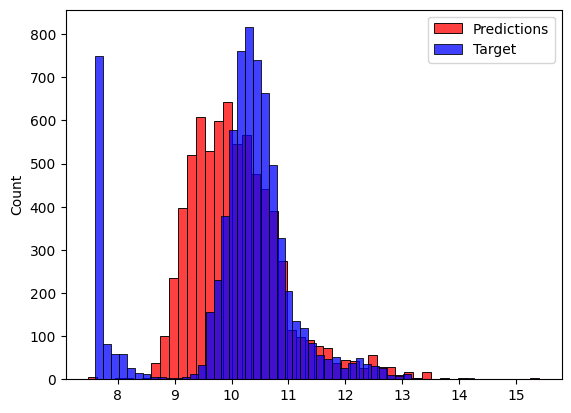

In [119]:
sns.histplot(y_pred, color="red", bins = 50)
sns.histplot(y_train, color = "blue", bins = 50)
plt.legend(labels=["Predictions","Target"])

As we can see, we don't really capture the distribution that well. However, we need an objective way to quantify how well the model actually captures the distribution.

# RMSE

In [125]:
def RMSE(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [126]:
RMSE(y_train, y_pred)

0.7554192603920132